# Classification - Assignment 7

## Data and Package Import

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import pylab as plt

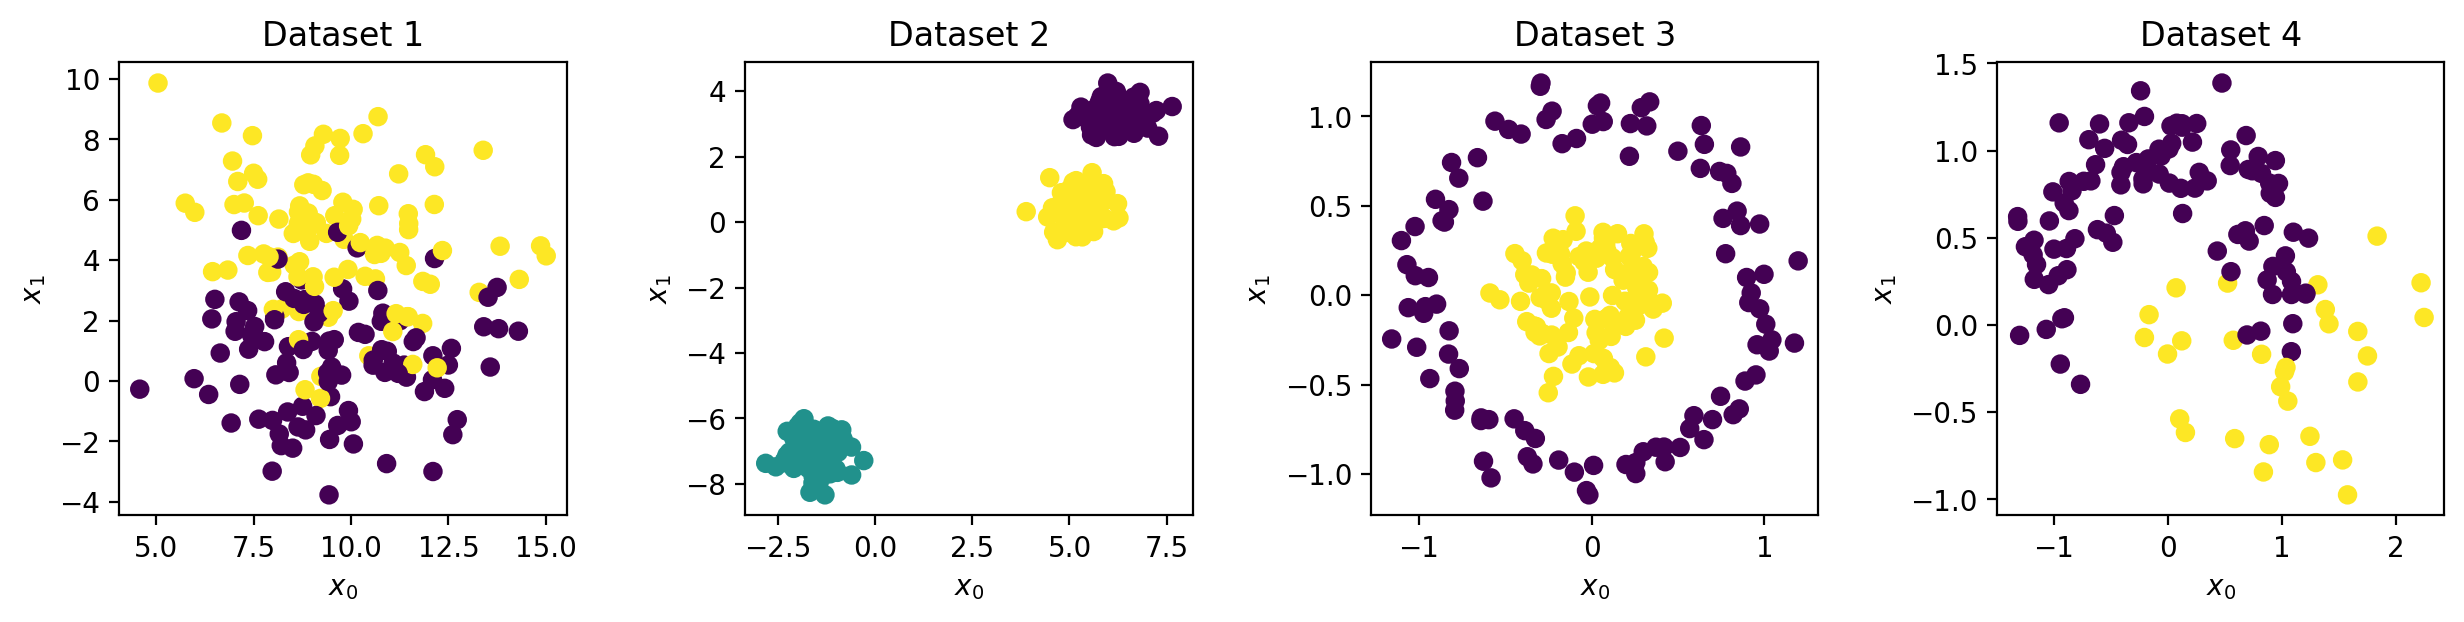

In [2]:
from sklearn.datasets import make_blobs, make_moons, make_circles
np.random.seed(4)

noisiness = 1

X_blob, y_blob = make_blobs(n_samples = 200, centers = 2, cluster_std = 2 * noisiness, n_features = 2)

X_mc, y_mc = make_blobs(n_samples = 200, centers = 3, cluster_std = 0.5 * noisiness, n_features = 2)

X_circles, y_circles = make_circles(n_samples = 200, factor = 0.3, noise = 0.1 * noisiness)

X_moons, y_moons = make_moons(n_samples = 200, noise = 0.25 * noisiness)

N_include = 30
idxs = []
Ni = 0
for i, yi in enumerate(y_moons):
    if yi == 1 and Ni < N_include:
        idxs.append(i)
        Ni += 1
    elif yi == 0:
        idxs.append(i)

y_moons = y_moons[idxs]
X_moons = X_moons[idxs]

fig, axes = plt.subplots(1, 4, figsize = (15, 3), dpi = 200)

all_datasets = [[X_blob, y_blob], [X_mc, y_mc], [X_circles, y_circles], [X_moons, y_moons]]

labels = ['Dataset 1', 'Dataset 2', 'Dataset 3', 'Dataset 4']
for i, Xy_i in enumerate(all_datasets):
    Xi, yi = Xy_i
    axes[i].scatter(Xi[:, 0], Xi[:, 1], c = yi)
    axes[i].set_title(labels[i])
    axes[i].set_xlabel('$x_0$')
    axes[i].set_ylabel('$x_1$')

fig.subplots_adjust(wspace = 0.4);

In [3]:
df = pd.read_csv('data/perovskite_data.csv')
X_perov = df[['nA', 'nB', 'nX', 'rA (Ang)', 'rB (Ang)', 'rX (Ang)', 't', 'tau']].values
y_perov = df['exp_label'].values

## 1. k-nearest Neighbors Model

### 1-NN
**Calculate the accuracy of a 1-nearest Neighbors model for the training data.**

A 1-nearest Neighbors model considers a point as its own nearest neighbors.

*Hint: the block below is not a code block.*

> Accuracy will be just 1. 1-NN simple memorizes the label of each data point.

**Will this be a reliable indicator of its accuracy for testing data?**

Briefly explain your answer.

> No. Even though the accuracy is 1, this cannot be a reliable indicator, since we know that this score is due to a simple memorization.

### Weighted Neighbors Classification

Instead of selecting the k-nearest neighbors to vote, we could design an algorithm where all neighbors get to vote, but their vote is weighted inversely to their distance from the point of interest:

$y_i = \sum_j y_j/(||x_i - x_j||)$

where $j$ is an index over all training points.

The class will be assigned as follows:

- class 1 if $y_i \geq 0$

- class -1 if $y_i < 0$

In [4]:
def distance(x1, x2):
    return np.linalg.norm(x1 - x2, 2)

In [5]:
def get_neighbor(x, x_list):
    dist_pairs = []
    for i, xi in enumerate(x_list):
        dist = distance(x, xi)
        dist_pairs.append([dist, i])
    return dist_pairs

**Write a function that assigns a class to a point.**

The function should take the followings as arguments:
- a single point `x`
- a list of training points `x_list`
- a list of training labels `y_list`

You may want to use functions above. You will also need to add a statement to avoid dividing by zero if the point is in the training set. If the distance between 2 points is zero, then the label from the same point in the training set should be used (e.g. if $x_i = x_j$ then $y_i = y_j$).

In [6]:
def assign_class(x, x_list, y_list):
    neighbors = get_neighbor(x, x_list)
    vote = 0
    
    for i, xi in enumerate(neighbors):
        vote += y_list[i] / neighbors[i][0]
        if neighbors[i][0] == 0:
            vote = y_list[i]
            break
    
    if vote >= 0:
        assignment = 1
    else:
        assignment = -1

    return assignment

**Write a function that returns the prediction for a given list of testing points.**

The function should take the followings as arguments:
- a list of testing points `X`
- a list of training points `X_train`
- a list of training labels `y_train`

In [7]:
def weighted_neighbors(X, X_train, y_train):
    y_hat = []
    for x in X:
        assign = assign_class(x, X_train, y_train)
        y_hat.append(assign)
    return y_hat

**Train the model for the perovskite dataset using a random selection of 75% of the data as training data.**

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_perov, y_perov, test_size = 0.25)
y_predict = weighted_neighbors(X_perov, X_train, y_train)

/Users/SihoonChoi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  


**Compute the accuracy and precision of the prediction.**

In [9]:
from sklearn.metrics import accuracy_score, precision_score

acc = accuracy_score(y_perov, y_predict)
prec = precision_score(y_perov, y_predict)

print('Accuracy: {}'.format(acc))
print('Precision: {}'.format(prec))

Accuracy: 0.9635416666666666
Precision: 0.9506172839506173


**Train a 5-NN model using the same training data.**

In [10]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(X_train, y_train)
y_predict = knn.predict(X_perov)

**Compute the accuracy and precision.**

In [11]:
acc = accuracy_score(y_perov, y_predict)
prec = precision_score(y_perov, y_predict)

print('Accuracy: {}'.format(acc))
print('Precision: {}'.format(prec))

Accuracy: 0.9322916666666666
Precision: 0.9391025641025641


## 2. Multi-dimensional Classification

### Simple logistic regression
**Train a logistic regression model using all columns except the `tau` column of the perovskite dataset.**

You may use some functions that have been already built in the previous assignments.

In [12]:
from sklearn.linear_model import LogisticRegression

X = X_perov[:, :-1]

logreg = LogisticRegression(penalty = 'none') # no regularization
logreg.fit(X, y_perov);

**Plot the confusion matrix.**

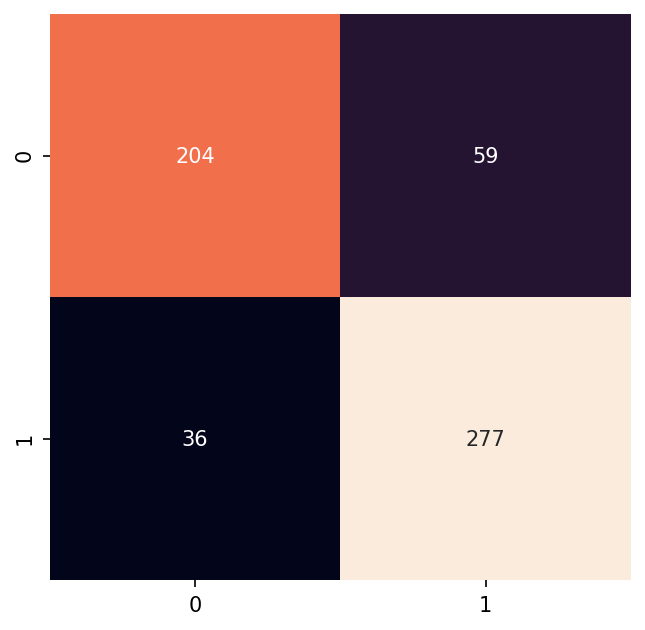

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_predict = logreg.predict(X)
cm = confusion_matrix(y_perov, y_predict)

fig, ax = plt.subplots(figsize = (5, 5), dpi = 150)
sns.heatmap(cm, annot = True, ax = ax, cbar = False, fmt = 'd');

**Compute the accuracy, precision and recall.**

In [14]:
from sklearn.metrics import recall_score

acc = accuracy_score(y_perov, y_predict)
prec = precision_score(y_perov, y_predict)
rec = recall_score(y_perov, y_predict)

print('Accuracy: {}'.format(acc))
print('Precision: {}'.format(prec))
print('Recall: {}'.format(rec))

Accuracy: 0.8350694444444444
Precision: 0.8244047619047619
Recall: 0.8849840255591054


### 6745 Only: Customizing non-linear boundaries

In this problem, you will create a single custom feature that improves the separation performance as much as possible.

**Plot the `y_perov` as a function of `rA (Ang)` and `rB (Ang)`.**

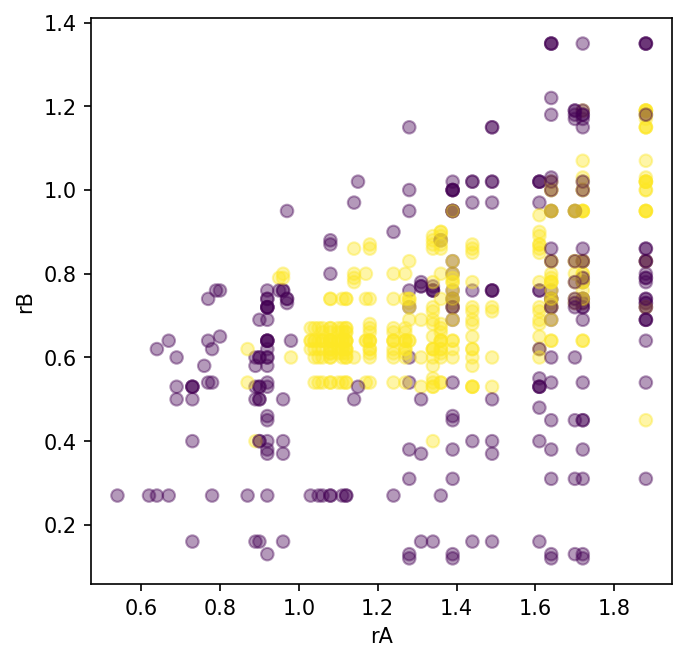

In [15]:
rA = X_perov[:, 3]
rB = X_perov[:, 4]

fig, ax = plt.subplots(figsize = (5, 5), dpi = 150)
ax.scatter(rA, rB, c = y_perov, alpha = .4)
ax.set_xlabel('rA')
ax.set_ylabel('rB');

**Build a baseline model based on logistic regression.**

Report the accuracy and precision of the baseline model.

In [16]:
logreg = LogisticRegression(penalty = 'none')

logreg.fit(X_perov[:, [3, 4]], y_perov)
y_predict = logreg.predict(X_perov[:, [3, 4]])

acc = accuracy_score(y_perov, y_predict)
prec = precision_score(y_perov, y_predict)

print('Accuracy: {}'.format(acc))
print('Precision: {}'.format(prec))

Accuracy: 0.6631944444444444
Precision: 0.6263269639065817


**Plot the prediction of the baseline model.**

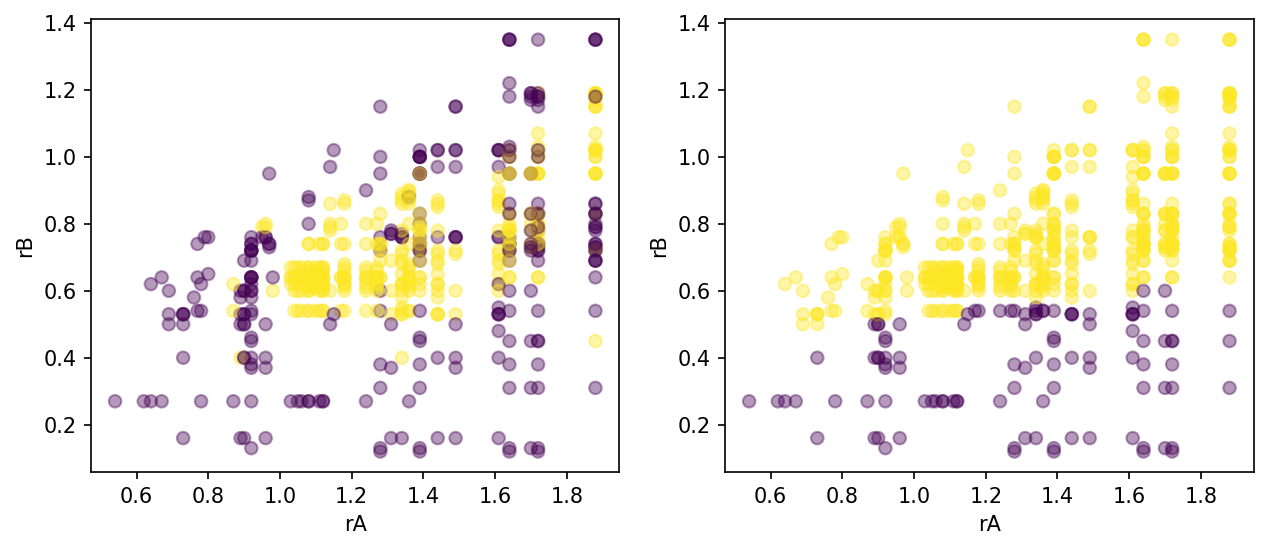

In [17]:
fig, axes = plt.subplots(1, 2, figsize = (10, 4), dpi = 150)

axes[0].scatter(rA, rB, c = y_perov, alpha = .4)
axes[0].set_xlabel('rA')
axes[0].set_ylabel('rB')

axes[1].scatter(rA, rB, c = y_predict, alpha = .4)
axes[1].set_xlabel('rA')
axes[1].set_ylabel('rB');

**Create a new feature based on a non-linear combination of `rA (Ang)` and `rB (Ang)`.**

Plot the new feature as a function of `rA (Ang)`.

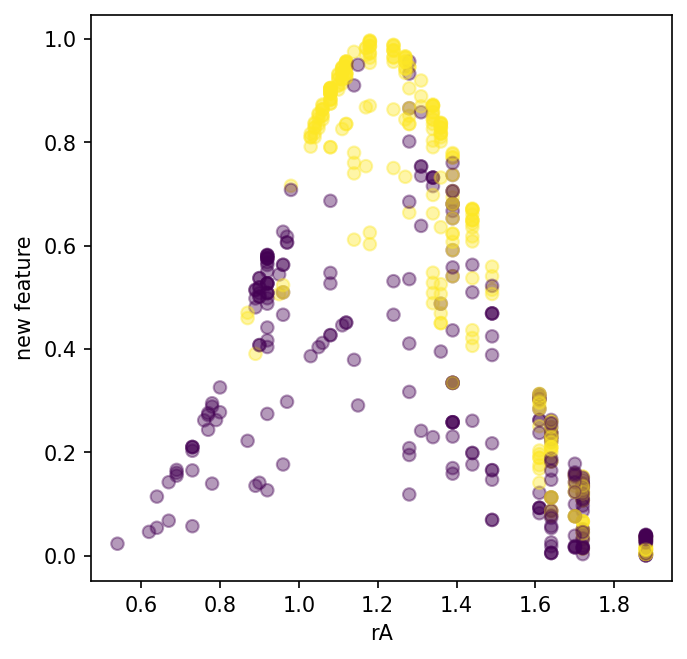

In [18]:
X_new = np.exp((rA - 1.2)**2 + (rB - 0.6)**2)**(-6.9)
X_new = X_new.reshape(-1, 1)

fig, ax = plt.subplots(figsize = (5, 5), dpi = 150)
ax.scatter(rA, X_new, alpha = .4, c = y_perov)
ax.set_xlabel('rA')
ax.set_ylabel('new feature');

**Build a new model that includes `rA (Ang)`, `rB (Ang)` and your new feature.**

Report the accuracy and precision.

In [19]:
X_new_matrix = np.append(X_perov[:, [3, 4]], X_new, 1)

logreg.fit(X_new_matrix, y_perov)
y_predict = logreg.predict(X_new_matrix)

acc = accuracy_score(y_perov, y_predict)
prec = precision_score(y_perov, y_predict)

print('Accuracy: {}'.format(acc))
print('Precision: {}'.format(prec))

Accuracy: 0.8038194444444444
Precision: 0.8597122302158273


**Plot the result of your new model.**

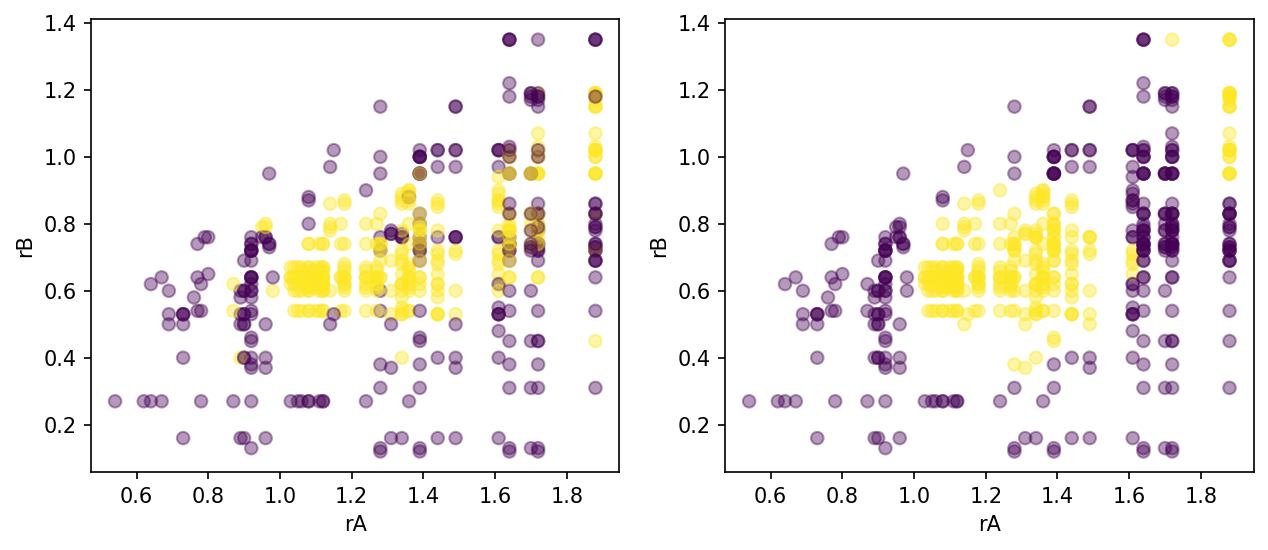

In [20]:
fig, axes = plt.subplots(1, 2, figsize = (10, 4), dpi = 150)

axes[0].scatter(rA, rB, c = y_perov, alpha = .4)
axes[0].set_xlabel('rA')
axes[0].set_ylabel('rB')

axes[1].scatter(rA, rB, c = y_predict, alpha = .4)
axes[1].set_xlabel('rA')
axes[1].set_ylabel('rB');

**Briefly explain how you decided on the feature.**

## 3. Comparison of Classification Model

In this problem, you will compare the classification performance of three different models using the perovskite dataset.

**Choose three different classification models and import them.**

These could be models discussed in the lectures, or others that you have learned about elsewhere.

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

rf = RandomForestClassifier()
logreg = LogisticRegression(solver = 'saga')
knn = KNeighborsClassifier()

**Make a hyperparameter grid for each model.**

You should optimize at least one hyperparameter for each model.

In [22]:
param_rf = {'n_estimators': [50, 100, 150], 'max_depth': [2, 3, 4]}
param_logreg = {'penalty': ['l1', 'l2', 'none']}
param_knn = {'n_neighbors': [2, 3, 4, 5]}

**Optimize hyperparameters.**

First, you select a validation set using hold-out (`train_test_split`). Optimize hyperparameters using `GridSearchCV` on the training set.

In [23]:
from sklearn.model_selection import GridSearchCV
import warnings

warnings.simplefilter('ignore')

X_train, X_test, y_train, y_test = train_test_split(X_perov, y_perov, test_size = .25)

rf_search = GridSearchCV(rf, param_rf, cv = 3)
logreg_search = GridSearchCV(logreg, param_logreg, cv = 3)
knn_search = GridSearchCV(knn, param_knn, cv = 3)

rf_search.fit(X_train, y_train)
logreg_search.fit(X_train, y_train)
knn_search.fit(X_train, y_train)

rf_best = rf_search.best_estimator_
logreg_best = logreg_search.best_estimator_
knn_best = knn_search.best_estimator_

**Compare the accuracy by predicting the results of the validation set.**

In [24]:
print('Accuracy of Random Forest: {}'.format(accuracy_score(y_test, rf_best.predict(X_test))))
print('Accuracy of Logistic Regression: {}'.format(accuracy_score(y_test, logreg_best.predict(X_test))))
print('Accuracy of k-Nearest Neighbors: {}'.format(accuracy_score(y_test, knn_best.predict(X_test))))

Accuracy of Random Forest: 0.9166666666666666
Accuracy of Logistic Regression: 0.6597222222222222
Accuracy of k-Nearest Neighbors: 0.9444444444444444


**Briefly describe your conclusions based on the results.**